<a href="https://colab.research.google.com/github/KaranRaman/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and analyze Dataset

In [1]:
import pandas as pd
import numpy as np

* Use the `sample` method to look at some random tweets present in dataset

In [2]:
df = pd.read_csv("tweet_data.csv")

In [3]:
df.sample(10)

,textID,tweet_text,sentiment
15909,1752797110,@JFabb Ahaha!! I have all of your albums. Eac...,positive
11506,1694859452,@bombchelle512 happy birthday and @joemwestbr...,positive
1464,1957696481,@maddieprior mother is hogging the TV,negative
5525,1963323669,My phone does not work in the DONS,negative
4645,1962711781,OH NO! MY FAN BROKE NOOOOOOOOOOOO! great now ...,negative
9122,1966207016,@AdamRPhoto ow shitttt i cant come get drunk i...,negative
12751,1695729896,staying home because I'm badass.,positive
2621,1960900130,@doug251192 not impressed....! it might go awa...,negative
16945,1753274982,"Happy Mother's Day to all the mums out there, ...",positive
11454,1694835789,@HemalRadia Hello pal..nice 2 c u today...have...,positive


* Check how many tweets there are in total

In [4]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [5]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [6]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


Dataset Visualization

In [7]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

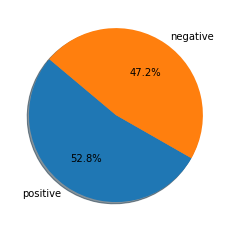

In [8]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

* Print the count of positive and negative tweets

In [9]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


Wordclouds

In [10]:
from wordcloud import WordCloud

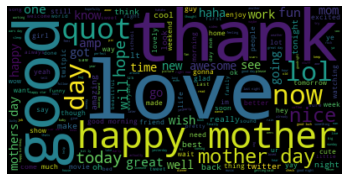

In [11]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

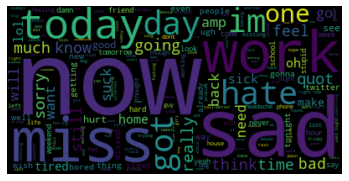

In [12]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text Normalization

In [13]:
import re

In [14]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

* Replace occurences of `RT` with a default value

In [15]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [16]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


In [17]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [18]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


In [19]:
pip install emoji --upgrade

     |████████████████████████████████| 175 kB 30.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1c767fe31eb9135d7d0591de07a8e1e7cbd5c1fd3a40648a91da70038c7f70fa
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [20]:
import emoji

In [21]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [22]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


In [23]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [24]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


In [25]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [26]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


In [27]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

Remove upper capitalization

In [28]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [29]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


Word repetition

In [30]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [31]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


Punctuation repetition

In [32]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [33]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


Word contraction

In [34]:
pip install contractions

     |████████████████████████████████| 106 kB 27.0 MB/s 
     |████████████████████████████████| 284 kB 37.9 MB/s 


In [35]:
import contractions

In [36]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [37]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [38]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


In [39]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [40]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


Tokenization

In [41]:
pip install nltk

In [42]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
tweet = "These are 5 different words!"

In [44]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [45]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


Custom Tokenization

In [46]:
import string

In [47]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'from', 'other', 'they', "isn't", 'doing', 'won', 'by', 'he', 'while', 'this', 'only', "wasn't", 'has', 'them', 'you', 's', 'whom', 'same', 't', 'don', 'does', 'on', "won't", 'above', 'weren', 'then', 'before', 'both', 'd', 'himself', 'll', 'once', 'ain', 'than', 'who', 'just', 'too', 'she', 'each', "you'd", 'needn', 'shan', 'the', 'having', 'yourselves', 'out', 'haven', 'herself', "you'll", 'is', "needn't", 'or', 'there', 'doesn', 'about', "couldn't", 'will', 'these', 'now', 'as', 'his', "should've", 'again', 'if', "hasn't", 'against', 're', 'here', 'for', 'theirs', 'my', 'did', 'itself', 'of', 've', 'not', 'why', 'more', 'have', 'being', 'during', 'that', "hadn't", 'isn', 'didn', 'those', 'had', "she's", 'some', 'when', 'themselves', 'until', 'hasn', 'off', 'over', 'to', 'do', 'any', "mustn't", 'up', 'wasn', "that'll", "shouldn't", 'their', "you're", 'ourselves', 'your', 'below', 'myself', 'through', 'most', 'aren', 'ours', "shan't", 'very', 'shouldn', 'nor', "didn't", 'few', 'an', 

In [50]:
stop_words.discard('not')
print(stop_words)

{'from', 'other', 'they', "isn't", 'doing', 'won', 'by', 'he', 'while', 'this', 'only', "wasn't", 'has', 'them', 'you', 's', 'whom', 'same', 't', 'don', 'does', 'on', "won't", 'above', 'weren', 'then', 'before', 'both', 'd', 'himself', 'll', 'once', 'ain', 'than', 'who', 'just', 'too', 'she', 'each', "you'd", 'needn', 'shan', 'the', 'having', 'yourselves', 'out', 'haven', 'herself', "you'll", 'is', "needn't", 'or', 'there', 'doesn', 'about', "couldn't", 'will', 'these', 'now', 'as', 'his', "should've", 'again', 'if', "hasn't", 'against', 're', 'here', 'for', 'theirs', 'my', 'did', 'itself', 'of', 've', 'why', 'more', 'have', 'being', 'during', 'that', "hadn't", 'isn', 'didn', 'those', 'had', "she's", 'some', 'when', 'themselves', 'until', 'hasn', 'off', 'over', 'to', 'do', 'any', "mustn't", 'up', 'wasn', "that'll", "shouldn't", 'their', "you're", 'ourselves', 'your', 'below', 'myself', 'through', 'most', 'aren', 'ours', "shan't", 'very', 'shouldn', 'nor', "didn't", 'few', 'an', 'hadn',

In [51]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [52]:
tweet = "these are 5 different words!"

In [53]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


Stemming

In [54]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [55]:
tokens = ["manager", "management", "managing"]

In [56]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [57]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [58]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [59]:
tokens = ["international", "companies", "had", "interns"]

In [60]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


Lemmatization

In [61]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [62]:
tokens = ["international", "companies", "had", "interns"]

In [63]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [66]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


Putting it all together

In [67]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

In [68]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [69]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [70]:
import random

In [71]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: @oheather78 Sweet! I'm a Jaycee one-letter-er I think. Just D!
Post Twitter processing tweet:  Sweet! I'm a Jaycee one-letter-er I think. Just D!
Post Word processing tweet:  sweet! i am a jaycee one-letter-er i think. just d!
['sweet', 'jayce', 'think']


Initial tweet: @vjestep I'm mo nudge you again, better watch out!
Post Twitter processing tweet:  I'm mo nudge you again, better watch out!
Post Word processing tweet:  i am mo nudge you again, better watch out!
['mo', 'nudg', 'better', 'watch']


Initial tweet: end of work... Thank God! I accomplished a number of things...  http://plurk.com/p/rpaag
Post Twitter processing tweet: end of work... Thank God! I accomplished a number of things...  
Post Word processing tweet: end of work. thank god! i accomplished a number of things.  
['end', 'work', 'thank', 'god', 'accomplish', 'number', 'thing']


Initial tweet: @stacey79 that sucks - I'm still hungry and sucked down my food.
Post Twitter processing tweet:  that sucks -

Text Representation

In [72]:
pip install -U scikit-learn

In [73]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [74]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [75]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'sta

Positive/Negative Frequency

In [76]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

In [77]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [78]:
freqs = build_freqs(corpus, sentiment)

In [79]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [80]:
freqs_all = build_freqs(X, y)

In [81]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1357
Frequency of word 'love' in - tweets: 67


In [82]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [83]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


In [84]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1357.   67.]


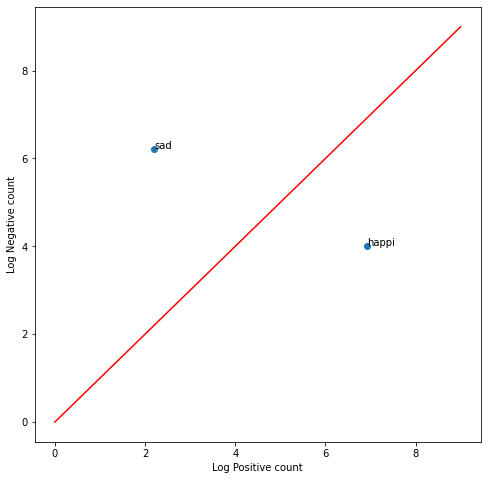

In [85]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

Bag of Word

In [86]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [89]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [90]:
ft = cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [92]:
cv_mtx = cv_vect.transform(corpus)

In [93]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [94]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [95]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [96]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Term Frequency – Inverse Document Frequency (TF-IDF)

In [97]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [100]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [101]:
ft = tf_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [103]:
print(tf_mtx.shape)

(6, 13)


In [104]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [105]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

Sentiment Model

In [106]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [107]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bc', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'sta

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [110]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


In [111]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['paid', 'bill', 'money']
Sentiment: 0


Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

In [114]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [115]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00266177 -0.00197023]] [-0.55167993]


Count Vector

In [116]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [117]:
model_lr_cv = fit_lr(X_train_cv, y_train)

TF-IDF

In [118]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [119]:
model_lr_tf = fit_lr(X_train_tf, y_train)

Performance Metrics

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Positive/Negative Frequencies

In [121]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [122]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 77.82%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

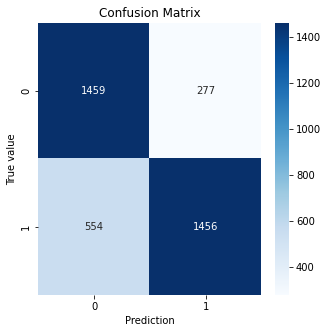

In [123]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

Count Vector

In [124]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [125]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.65%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

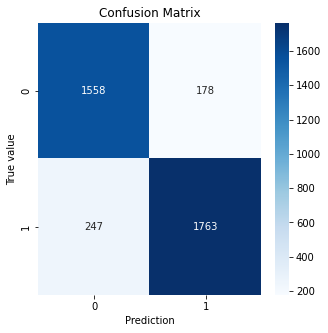

In [126]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

TF-IDF

In [127]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [128]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.71%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

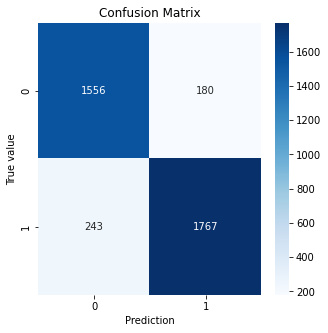

In [129]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

Mini-Pipeline

In [130]:
your_tweet = """RT @AIOutsider: tune in for more amazing NLP content! 
And don't forget to visit https://AIOutsider.com ..."""

In [131]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [132]:
predict_tweet(your_tweet)

'Prediction is positive sentiment'